In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pickle

In [2]:
df = pd.read_csv('https://github.com/dsrscientist/DSData/raw/master/loan_prediction.csv')

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Exploratory data analysis

In [4]:
# dimensions of df

In [5]:
df.shape

(614, 13)

614 rows and 13 columns

In [6]:
# list of columns

In [7]:
list(df.columns)

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [8]:
# columns description

Independent variables

1.Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases

2.Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions

3.Married - This refers to applicant being in a state of matrimony

4.Dependents - This refres to persons who depends on the applicants for survival

5.Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university

6.Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer

7.Applicant Income - This refers to disposable income available for the applicant's use under State law.

8.CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.

9.Loan_Amount - This refers to the amount of money an applicant owe at any given time.

10.Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant

11.Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.

12.Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.

Dependent variable 

13.Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.


In [9]:
# a snapshot of the dataset's structure

In [10]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [11]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


- there are missing data
- the column Dependents should be categorical (presence of '3+' values)
- the column CoapplicantIncome seems to have a lot of 0 values

In [12]:
# summarizing the variables, showing first look of non-null entries and variable types

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


the features Loan_ID, Education, ApplicantIncome, CoapplicantIncome, Property area don't have missing values

In [14]:
# cross-checking data types

In [15]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [16]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

- CoapplicantIncome and LoanAmount will be converted into integer
- Loan_Amount_Term and Credit_History will be converted into object
- Loan_ID to be set as index

In [17]:
# missing values

In [18]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [19]:
df['CoapplicantIncome'] = df['CoapplicantIncome'].astype(int)

In [20]:

if df['LoanAmount'].isnull().any():
    # Handle NaN before converting
    df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True) 
    df['LoanAmount'] = df['LoanAmount'].astype(int)  # Convert to integer
else:
    df['LoanAmount'] = df['LoanAmount'].astype(int)  # Convert to integer directly

In [21]:
if df['Loan_Amount_Term'].isnull().any():
    # Handle NaN before converting
    df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True) 
    df['Loan_Amount_Term'] = df['Loan_Amount_Term'].astype(object)  # Convert to integer
else:
    df['Loan_Amount_Term'] = df['Loan_Amount_Term'].astype(object)  # Convert to integer directly

In [22]:
if df['Credit_History'].isnull().any():
    # Handle NaN before converting
    df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True) 
    df['Credit_History'] = df['Credit_History'].astype(object)  # Convert to integer
else:
    df['Credit_History'] = df['Credit_History'].astype(object)  # Convert to integer directly

In [23]:
df.set_index('Loan_ID', inplace = True)

In [24]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

Males are dominant. So, NaN will be filled with the mode

In [25]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

Yes is dominant. So, NaN will be replaced by the mode

In [26]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

0 is dominant. so, NaN will be filled with the mode

In [27]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

No is dominant. so, NaN will be filled with the mode 

In [28]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])

In [29]:
df['Married']=df['Married'].fillna(df['Married'].mode()[0])

In [30]:
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])

In [31]:
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [32]:
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Gender             614 non-null    object
 1   Married            614 non-null    object
 2   Dependents         614 non-null    object
 3   Education          614 non-null    object
 4   Self_Employed      614 non-null    object
 5   ApplicantIncome    614 non-null    int64 
 6   CoapplicantIncome  614 non-null    int64 
 7   LoanAmount         614 non-null    int64 
 8   Loan_Amount_Term   614 non-null    object
 9   Credit_History     614 non-null    object
 10  Property_Area      614 non-null    object
 11  Loan_Status        614 non-null    object
dtypes: int64(3), object(9)
memory usage: 62.4+ KB


In [34]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0,146,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508,128,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0,141,360.0,1.0,Urban,Y


In [35]:
df.loc[df.duplicated(),]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,


No duplicates

In [36]:
# summary statistics and first look at the outliers

In [37]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.00000,614.000000
mean,5403.459283,1621.24430,146.397394
std,6109.041673,2926.24876,84.037503
min,150.000000,0.00000,9.000000
25%,2877.500000,0.00000,100.250000
50%,3812.500000,1188.50000,129.000000
75%,5795.000000,2297.25000,164.750000
max,81000.000000,41667.00000,700.000000


In [38]:
def box(columns, data, a, b, c, d):
    plt.figure(figsize = (10, 3), facecolor = 'purple')
    j = 1
    for i in columns:
        if j<=a:
            ax = plt.subplot(b, c, j)
            sns.boxplot(data[i], palette = 'colorblind')
            plt.xlabel(i, fontsize = d)
        j+=1
        
        plt.tight_layout()

In [39]:
col = []
for i in df.columns:
    if df[i].dtypes in ['float', 'int']:
        col.append(i)

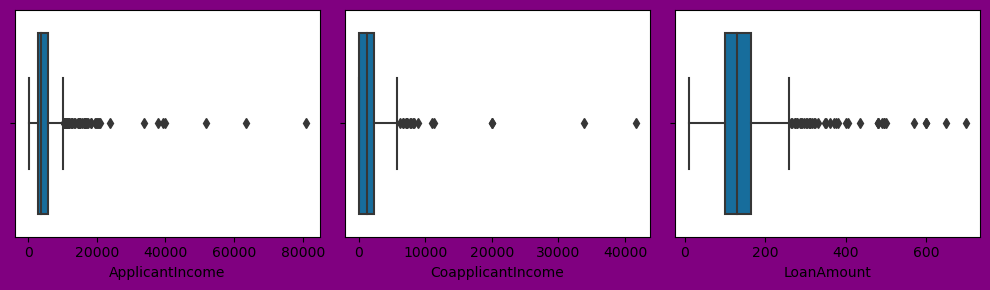

In [40]:
box(col, df,len(col), 1, 3, 10)

In [41]:
df['CoapplicantIncome'].value_counts()

0       273
2500      5
2083      5
1666      5
2250      3
       ... 
2791      1
1010      1
1695      1
2598      1
240       1
Name: CoapplicantIncome, Length: 287, dtype: int64

the column CoapplicantIncome is imbalanced with 0 values. this can negatively affect the model's performance. So we should remove it

In [42]:
df.drop('CoapplicantIncome', axis = 1, inplace = True)

- as long as the bank doesn’t have a loan amount limit, there should not be outlier for LoanAmount
- the max of ApplicantIncome is a real-life logical value. so there should not be outlier for ApplicantIncome
- let’s check whether these values bring skewness to the data

In [43]:
col = []
for i in df.columns:
    if df[i].dtypes in ['float', 'int']:
        col.append(i)
        
df[col].skew()

ApplicantIncome    6.539513
LoanAmount         2.727127
dtype: float64

In [44]:
# are the 2 columns correlated?

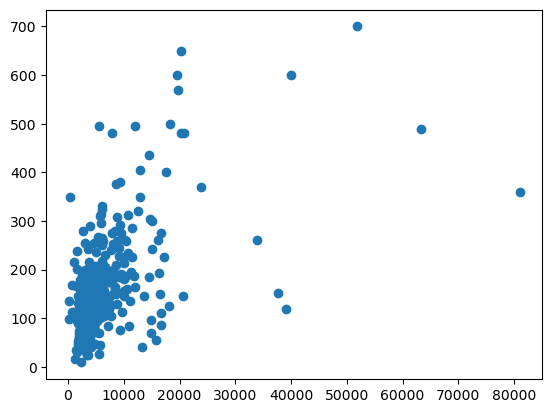

In [45]:
plt.scatter(df['ApplicantIncome'], df['LoanAmount'])

In [46]:
df.corr()

,ApplicantIncome,LoanAmount
ApplicantIncome,1.000000,0.565621
LoanAmount,0.565621,1.000000


there is correlation but not strong

In [47]:
# let's remove skewness

In [48]:
from scipy.stats import yeojohnson

# Select the column(s) to remove skewness
columns_to_transform = ['LoanAmount']

# Apply Yeo-Johnson transformation to selected columns
df[columns_to_transform] = df[columns_to_transform].apply(lambda a: yeojohnson(a + abs(a.min()) + 1)[0])


In [49]:
df[col].skew()

ApplicantIncome    6.539513
LoanAmount        -0.015428
dtype: float64

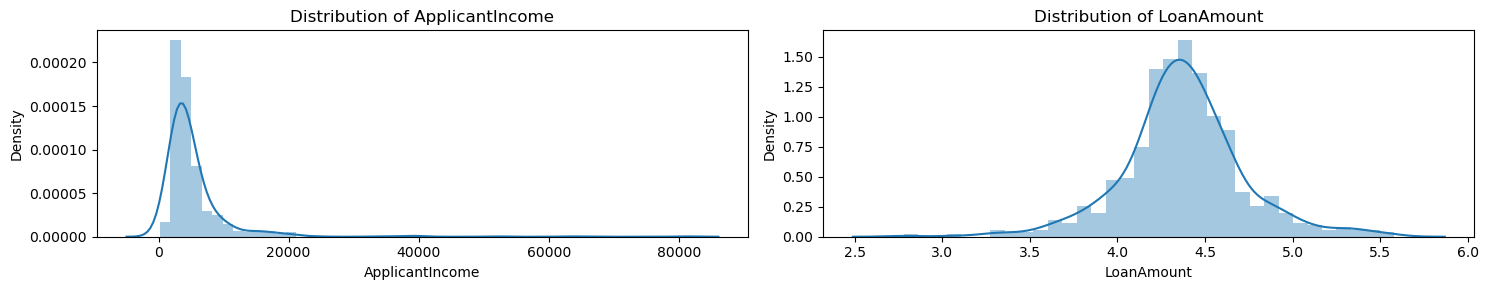

In [50]:
numeric_columns = df.select_dtypes(include=['number']).columns

# Calculate the number of rows and columns for subplots
num_columns = len(numeric_columns)
num_rows = (num_columns // 2) + (num_columns % 2)

# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(15, 3 * num_rows))
axes = axes.flatten()

# Plot distributions for each numeric column using a for loop
for i, column in enumerate(numeric_columns):
    ax = axes[i]
    sns.distplot(df[column], kde=True, ax=ax)
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

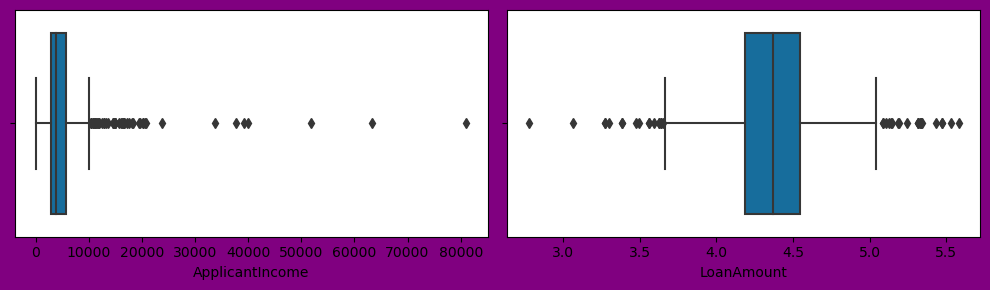

In [51]:
box(col, df,len(col), 1, 2, 10)

In [52]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,4.456627,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,4.362255,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,3.896076,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,4.316103,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,4.431602,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
LP002978,Female,No,0,Graduate,No,2900,3.946402,360.0,1.0,Rural,Y
LP002979,Male,Yes,3+,Graduate,No,4106,3.562507,180.0,1.0,Rural,Y
LP002983,Male,Yes,1,Graduate,No,8072,4.852867,360.0,1.0,Urban,Y


- ApplicantIncome is highly skewed and removing skewness renders it constant.
- let's remove outliers in this column and see

In [55]:
# zscore method

from scipy.stats import zscore

feat = df[col]

# Calculate z-scores using scipy.stats.zscore
z_scores = zscore(feat)

# Convert the result to a DataFrame
z_score = pd.DataFrame(z_scores, columns=feat.columns)
z = z_score.abs()

# Display the DataFrame with z-scores
print(z)

          ApplicantIncome  LoanAmount
Loan_ID                              
LP001002         0.072991    0.240589
LP001003         0.134412    0.030642
LP001005         0.393747    1.370460
LP001006         0.462062    0.163284
LP001008         0.097728    0.168664
...                   ...         ...
LP002978         0.410130    1.225823
LP002979         0.212557    2.329154
LP002983         0.437174    1.379401
LP002984         0.357064    0.752745
LP002990         0.134412    0.048246

[614 rows x 2 columns]


In [57]:
x = df[(z<3).all(axis = 1)]

print('data lost in %: ', (df.shape[0]-x.shape[0])/df.shape[0]*100)

data lost in %:  2.6058631921824107


In [58]:
df[col].skew()

ApplicantIncome    6.539513
LoanAmount        -0.015428
dtype: float64

- Removing outliers doesn’t change anything in the skewness
- because ApplicantIncome is highly skewed and removing skewness renders it constant, and due to the correlation with LoanAmount, we will drop this column

In [59]:
df.drop('ApplicantIncome', axis = 1, inplace = True)

In [60]:
df.shape

(614, 10)

In [61]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()

for column in df:
    if df[column].dtypes == 'object':  
        df[column] = encoder.fit_transform(df[column].values.reshape(-1,1))


df

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,
LP001002,1.0,0.0,0.0,0.0,0.0,4.456627,8.0,1.0,2.0,1.0
LP001003,1.0,1.0,1.0,0.0,0.0,4.362255,8.0,1.0,0.0,0.0
LP001005,1.0,1.0,0.0,0.0,1.0,3.896076,8.0,1.0,2.0,1.0
LP001006,1.0,1.0,0.0,1.0,0.0,4.316103,8.0,1.0,2.0,1.0
LP001008,1.0,0.0,0.0,0.0,0.0,4.431602,8.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...
LP002978,0.0,0.0,0.0,0.0,0.0,3.946402,8.0,1.0,0.0,1.0
LP002979,1.0,1.0,3.0,0.0,0.0,3.562507,5.0,1.0,0.0,1.0
LP002983,1.0,1.0,1.0,0.0,0.0,4.852867,8.0,1.0,2.0,1.0


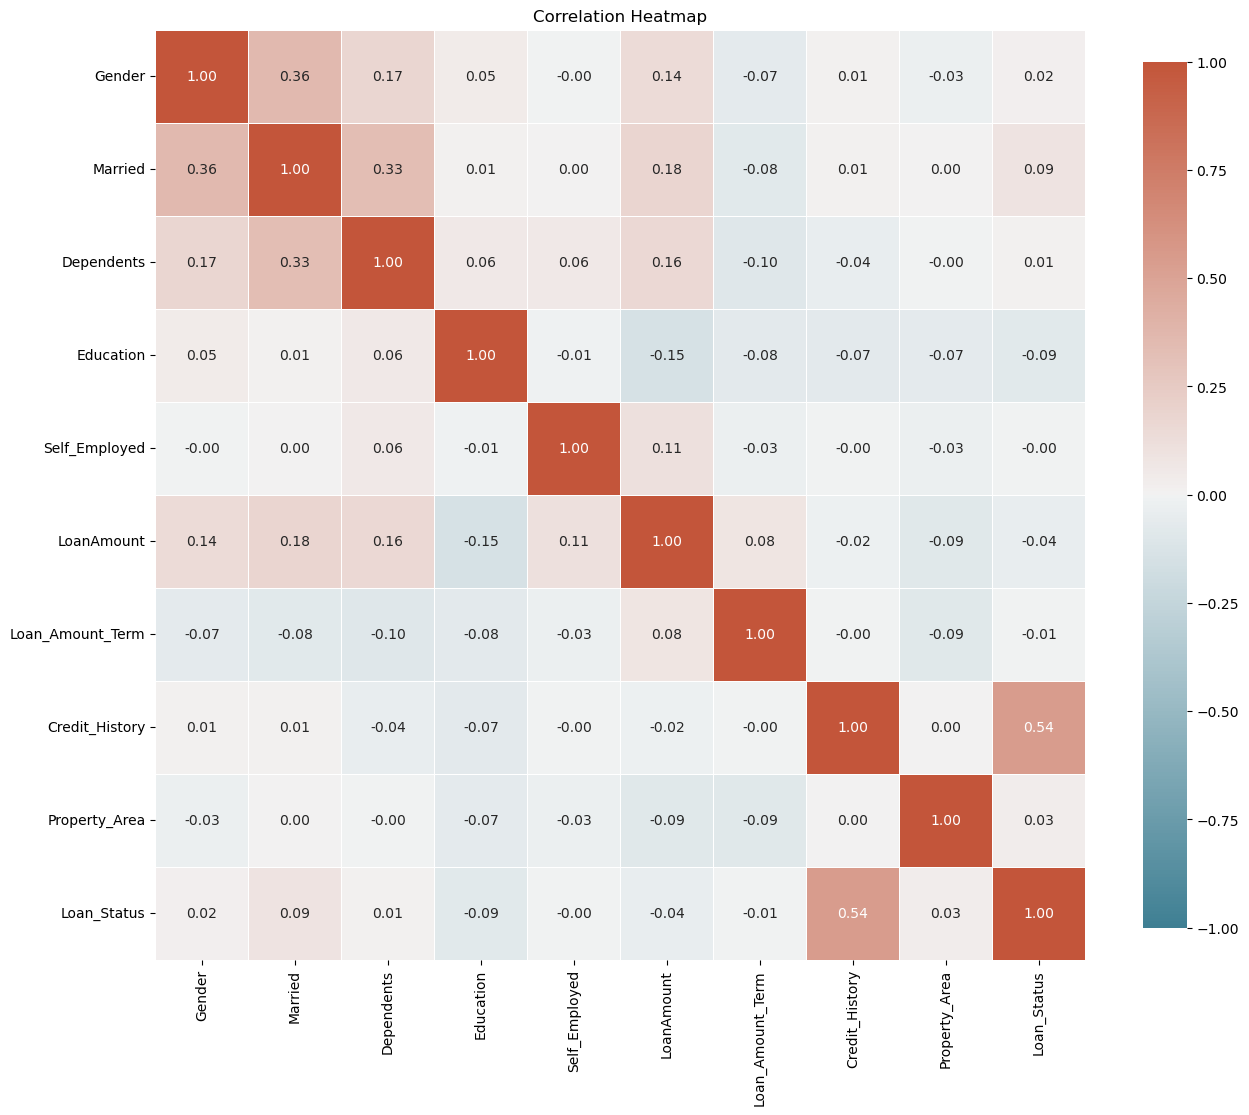

In [62]:
corr_matrix = df.corr()
plt.figure(figsize=(15, 15))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(corr_matrix, cmap=cmap, annot=True, fmt=".2f", vmin=-1, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .75})
plt.title("Correlation Heatmap")
plt.show()

No multicolinearity

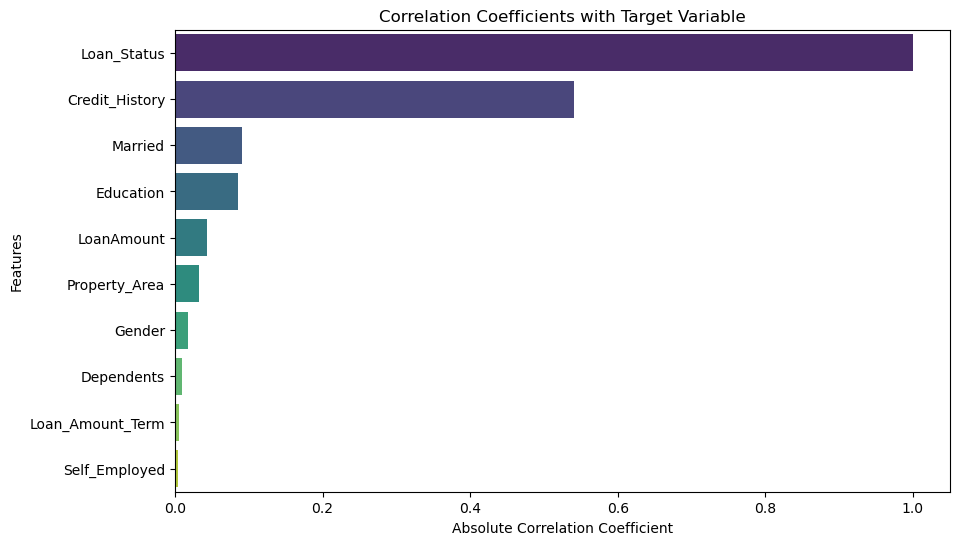

In [63]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Extract correlations with the target variable
corr_with_target = corr_matrix['Loan_Status'].abs()

# Sort the correlations in descending order
sorted_corr = corr_with_target.sort_values(ascending=False)

# Create a bar plot to visualize the sorted correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_corr.values, y=sorted_corr.index, palette="viridis")
plt.title("Correlation Coefficients with Target Variable")
plt.xlabel("Absolute Correlation Coefficient")
plt.ylabel("Features")
plt.show()

- Self_Employed and Loan_Amount_Term are not correlated with the target. they shouldbe remove

In [64]:
df.drop(['Self_Employed','Loan_Amount_Term'], axis = 1, inplace = True)

In [65]:
# seprating features and target

x = df.drop('Loan_Status', axis =1)
y = df['Loan_Status']

In [66]:
y.value_counts()

1.0    422
0.0    192
Name: Loan_Status, dtype: int64

In [67]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X, Y = smote.fit_resample(x, y)


In [68]:
Y.value_counts()

1.0    422
0.0    422
Name: Loan_Status, dtype: int64

In [69]:
x=X
y=Y

In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler


# Standardize the variables
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

# Calculate VIF for each standardized variable
vif = pd.DataFrame()
vif["Variable"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

# Display the DataFrame with VIF values for standardized variables
print(vif)

         Variable       VIF
0          Gender  1.189025
1         Married  1.333144
2      Dependents  1.189219
3       Education  1.055401
4      LoanAmount  1.097552
5  Credit_History  1.011871
6   Property_Area  1.021423


# modelling

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics 
import joblib
import pickle

In [72]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Define classifier
clf = RandomForestClassifier()

# Define parameters for grid search
param_grid = {'random_state': range(1, 101)}

# Perform grid search
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Get the best random state
best_random_state = grid_search.best_params_['random_state']
print(f"Best Random State: {best_random_state}")

Best Random State: 21


In [73]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=21)

In [74]:
# training the data on each algorithm and CV

L = LogisticRegression()
R = RandomForestClassifier()
E = ExtraTreesClassifier()
G = GradientBoostingClassifier()
A = AdaBoostClassifier()
B = BaggingClassifier()
S = SVC()

Mod = [L,R,E,G,A,B,S]

for model in Mod:
    model.fit(x_train,y_train)
    pred_model = model.predict(x_test)
    acc = accuracy_score(y_test, pred_model)
    pred_train = model.predict(x_train)
    print('accuracy_score on training data: ', accuracy_score(y_train, pred_train))
    score = cross_val_score(model,x,y)
    print(accuracy_score(y_test, pred_model))
    print(confusion_matrix(y_test, pred_model))
    print(classification_report(y_test, pred_model))
    print(score)
    print(score.mean())
    print('The difference between accuracy score and cross validation score of ', model, 'is: ', accuracy_score(y_test, pred_model) - score.mean())
    print('\n')

accuracy_score on training data:  0.7377567140600316
0.7203791469194313
[[ 49  52]
 [  7 103]]
              precision    recall  f1-score   support

         0.0       0.88      0.49      0.62       101
         1.0       0.66      0.94      0.78       110

    accuracy                           0.72       211
   macro avg       0.77      0.71      0.70       211
weighted avg       0.77      0.72      0.70       211

[0.68047337 0.73964497 0.76923077 0.68639053 0.73809524]
0.7227669766131305
The difference between accuracy score and cross validation score of  LogisticRegression() is:  -0.002387829693699217


accuracy_score on training data:  0.990521327014218
0.8104265402843602
[[81 20]
 [20 90]]
              precision    recall  f1-score   support

         0.0       0.80      0.80      0.80       101
         1.0       0.82      0.82      0.82       110

    accuracy                           0.81       211
   macro avg       0.81      0.81      0.81       211
weighted avg       0.

- RandomForestClassifier() and ExtraTreesClassifier() are the two best models because they have the best precision for the eligible to be availed loan and highest training accuracy.

- RandomForestClassifier() has less difference of cross-val-score and acuuracy, and has higher accuracy than ExtraTreesClassifier()

- based on the above, we select RandomForestClassifier() as our best model

In [75]:
param_grid = {
    'n_estimators': [50, 100, 200],            # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],            # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],            # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],              # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']    # Number of features to consider for the best split
}

GV = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
GV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [76]:
GV.best_params_

{'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

In [78]:
my_model = RandomForestClassifier(max_depth=20, max_features='sqrt',min_samples_leaf=1,min_samples_split=2, 
                                  n_estimators=50)
my_model.fit(x_train, y_train)
pred = my_model.predict(x_test)
print('Acuuracy Score=', (accuracy_score(y_test, pred))*100) 


Acuuracy Score= 80.56872037914692


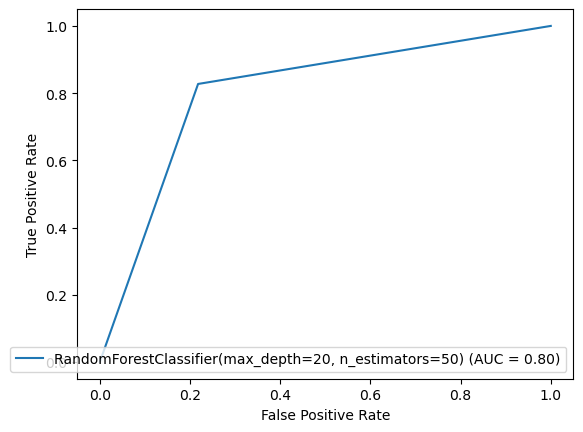

In [79]:
# ROC curve
a, b, thresholds = metrics.roc_curve(y_test, pred)
f = metrics.auc(a, b)
display = metrics.RocCurveDisplay(fpr=a, tpr=b, roc_auc = f, estimator_name = my_model)
display.plot()
plt.show()

In [80]:
pickle.dump(my_model, open('Loan_Romuald.pkl', 'wb'))

# Recommendations

1 - Feature Engineering:

- we should consider exploring additional feature engineering techniques to create new features that might improve the model's performance.

- we should evaluate the impact of combining 'ApplicantIncome' and 'CoapplicantIncome' into a single feature, or deriving a new feature that represents the total income.


2 - Handling Imbalanced Classes:

- While SMOTE has been applied to handle imbalanced classes, we should continue to monitor the impact on model performance and explore other techniques if needed, such as adjusting class weights or trying different oversampling methods.

3 - Outliers:

- we should further investigate the outliers in 'LoanAmount' and 'ApplicantIncome' to ensure that they are not errors in the data. If they are valid data points, we should consider if there are any business reasons to cap or scale these values.

4 - Missing Values:

- In case possible, we should explore more sophisticated imputation techniques for handling missing values, such as predictive modeling or clustering-based imputation, to improve the quality of the imputed data.

5 - Correlation Analysis:

- we should reevaluate the removal of 'Self_Employed' and 'Loan_Amount_Term' based on their correlation with the target variable. It's essential to strike a balance between simplicity and model performance.

6 - Model Evaluation:

- we should consider using additional metrics besides accuracy for model evaluation, especially for imbalanced datasets. we can further add precision, recall, and F1-score to provide a more comprehensive understanding of the model's performance.

7 - Interpretability:

- we should evaluate the interpretability of the chosen model (RandomForestClassifier) to ensure that stakeholders can understand and trust the model's predictions. we can use model-agnostic interpretability techniques if needed.

8 - deployment and Monitoring:

- Once the model is deployed, we should establish a monitoring system to track its performance over time. Regularly update the model with new data and reevaluate its performance periodically.

9 - Documentation:

- we should document the entire data preprocessing and modeling pipeline thoroughly. This documentation will be valuable for reproducibility and for sharing insights with other stakeholders.

10 - Continuous Improvement:

- Machine learning is a continue process. We should continue to iterate on the model by experimenting with different algorithms, hyperparameter tuning, and feature engineering techniques to achieve better performance.
